# Oura Data Analysis

## Comparing sleep and heart rate data from 2 different Oura rings worn at the same time
Compared metrics:
* Total sleep time
* Awake time during sleep
* REM sleep time
* Light sleep time
* Deep sleep time
* Average resting heart rate during sleep
* Lowest resting heart rate during sleep

Some dates were missing data for the left hand -> bar plots comparing the individual dates more appropriate vs. a line plot.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df_left_hand = pd.read_csv('data/oura_data_analysis - left_hand.csv')
df_right_hand = pd.read_csv('data/oura_data_analysis - right_hand.csv')

total_sleep_time_column = "Total Sleep Time"
awake_time_column = "Awake Time"
rem_sleep_time_column = "REM Sleep Time"
light_sleep_time_column = "Light Sleep Time"
deep_sleep_time_column = "Deep Sleep Time"
average_hr_column = "Average Resting Heart Rate"
lowest_hr_column = "Lowest Resting Heart Rate"

date_column = "date"

dates = df_left_hand[date_column]
keep_idx = total_sleep_times_left_hand.notnull() #Left hand had some missing data when the battery had died
labels = dates[keep_idx]

def plot_data(column, ylabel, divider=1):
    x = np.array(range(len(labels)))
    fig, ax = plt.subplots(1,1,figsize=(20,8))
    left_hand_data = df_left_hand[column][keep_idx] / divider
    right_hand_data = df_right_hand[column][keep_idx] / divider
    ax.bar(x-0.40, left_hand_data, width=0.40, align='center', label="Left hand")
    ax.bar(x, right_hand_data, width=0.40,  align='center', label="Right hand")
    ax.set_xticklabels(labels)
    ax.set_xticks(x-0.2)
    ax.set(frame_on=False)
    ax.set(ylabel=ylabel, xlabel="Date")
    fig.suptitle(column, fontsize=20)
    plt.legend(fancybox=True, ncol=2, frameon=False);
    for index, label in enumerate(ax.get_xticklabels()):
        if index % 5 != 0:
            label.set_visible(False)

    plt.show()

## Sleep data

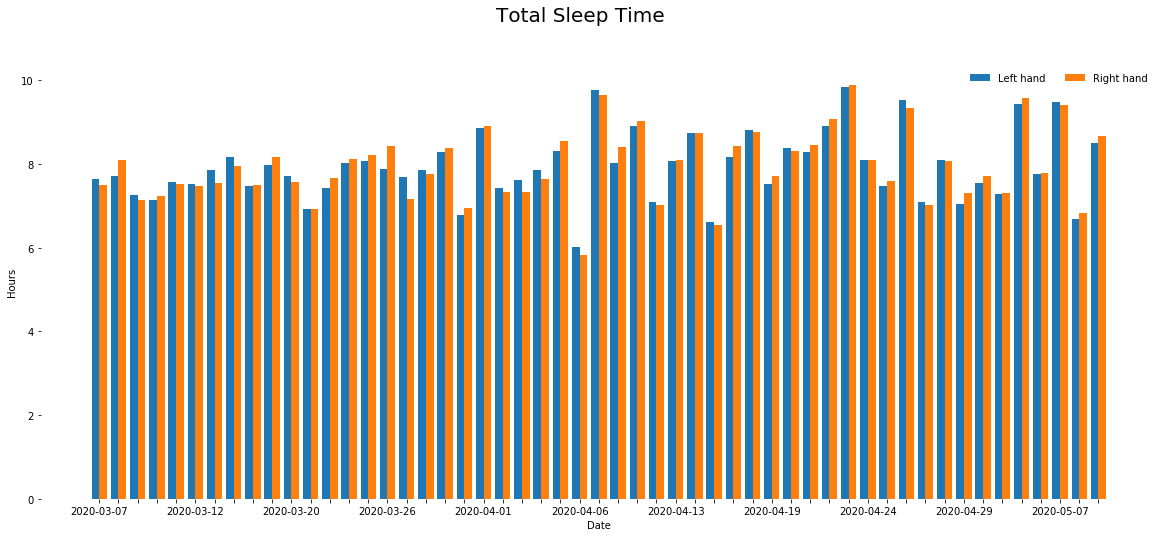

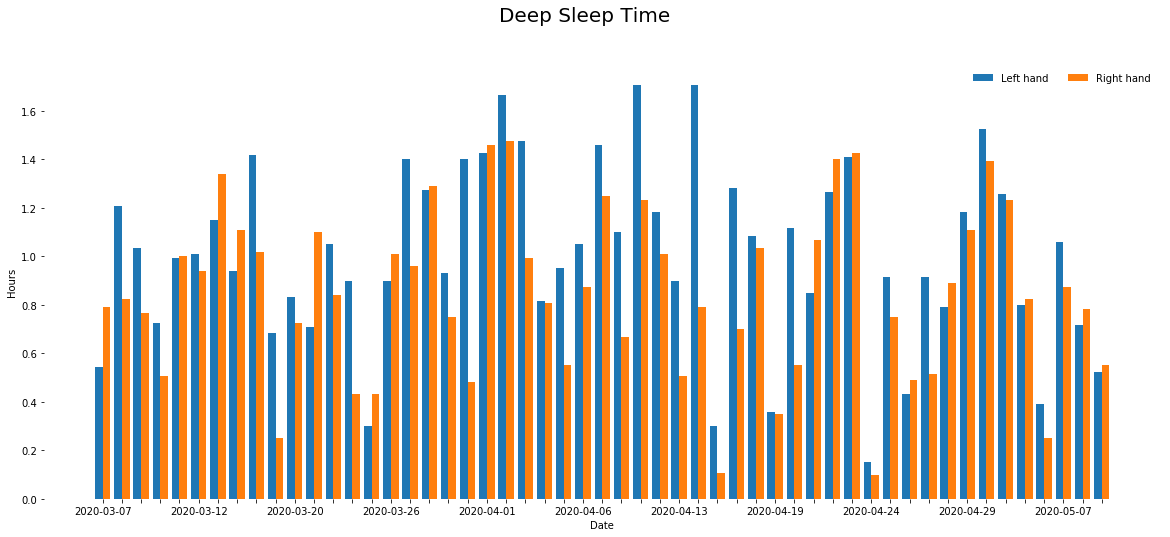

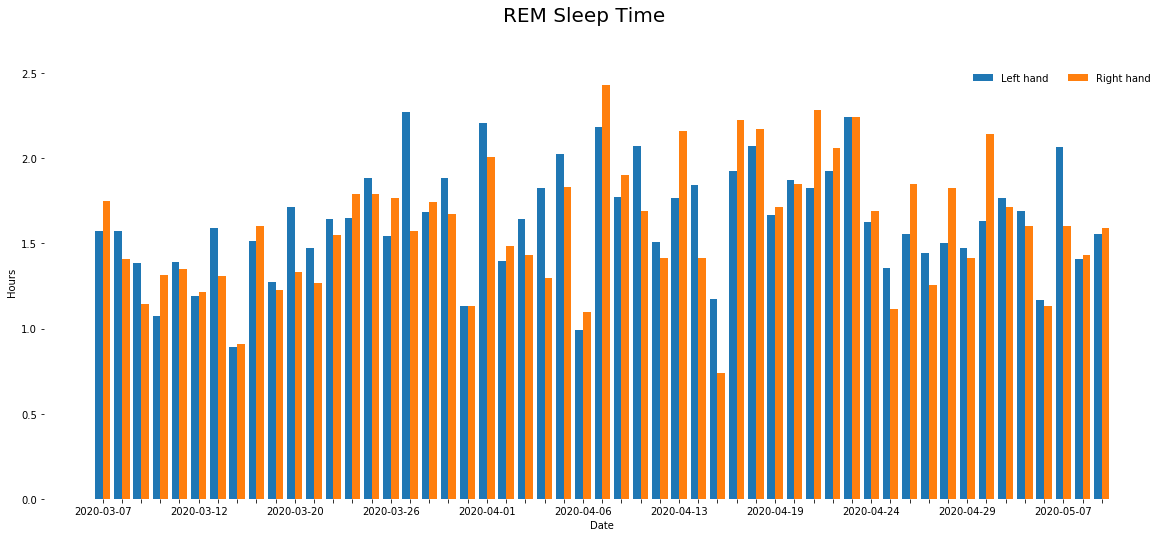

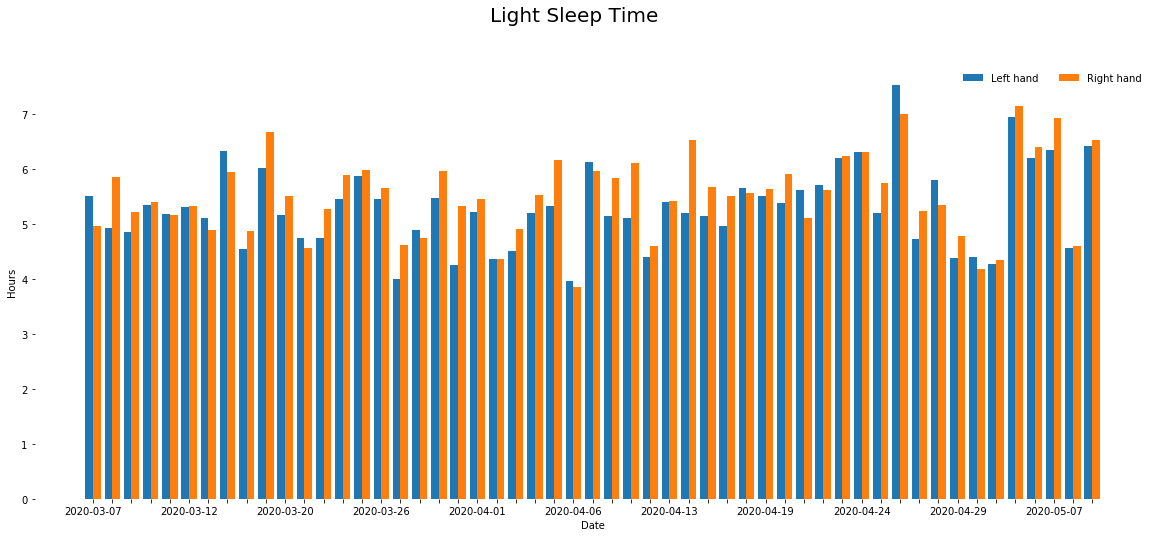

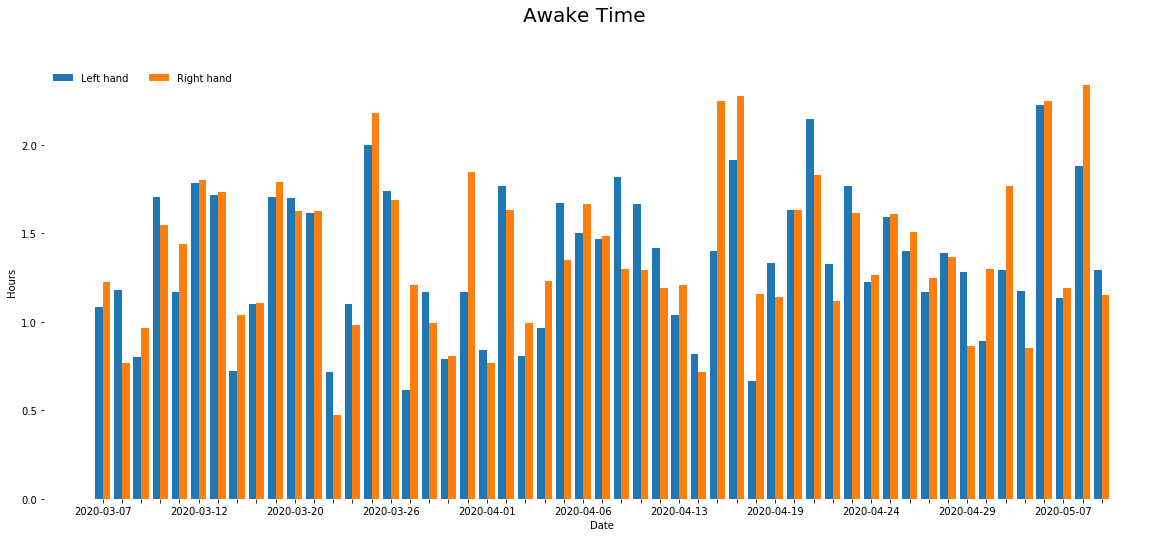

In [169]:
plot_data(total_sleep_time_column, "Hours", 3600)
plot_data(deep_sleep_time_column, "Hours", 3600)
plot_data(rem_sleep_time_column, "Hours", 3600)
plot_data(light_sleep_time_column, "Hours", 3600)
plot_data(awake_time_column, "Hours", 3600)

## HR data

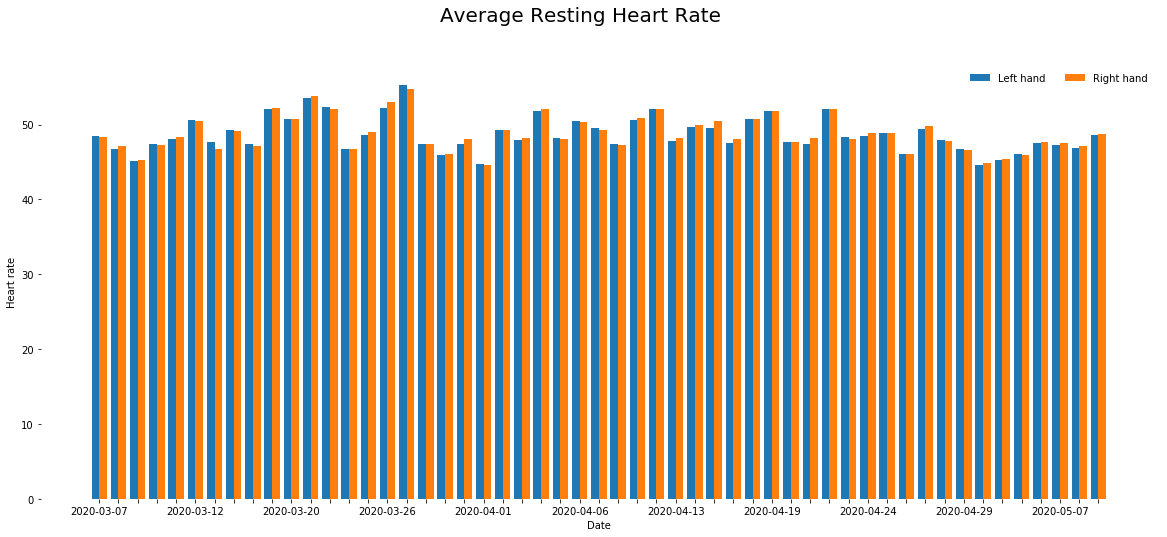

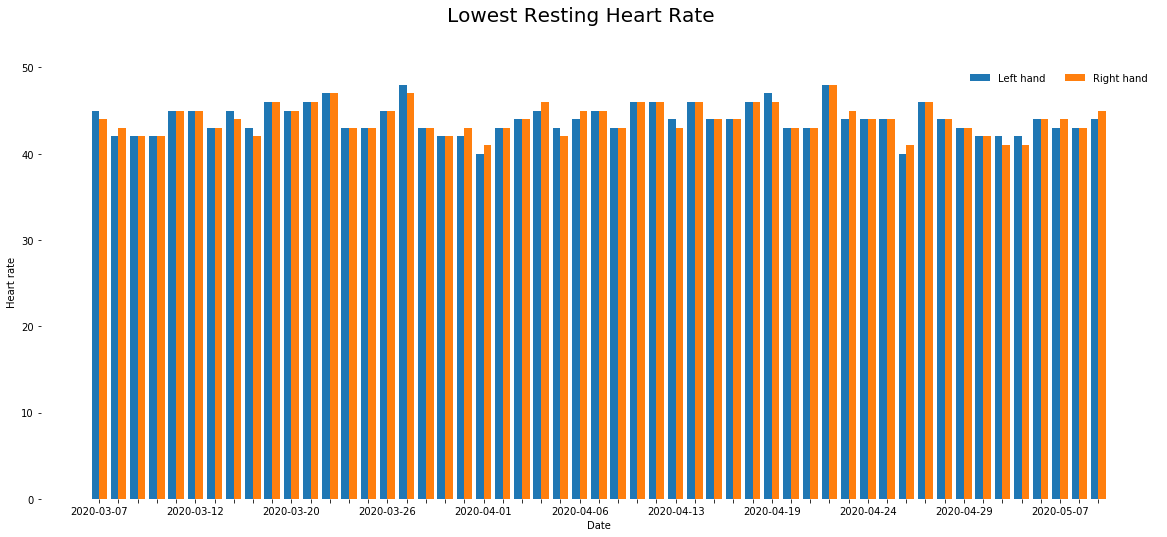

In [170]:
plot_data(average_hr_column, "Heart rate")
plot_data(lowest_hr_column, "Heart rate")